Total Order Value per Customer:
  customer_name  order_value
0          Amit         3999
1     Dipshikha         2962
2          John         6721
3         Priya         5503
4          Sara         6232

Average Delivery Time per Customer:
  customer_name  delivery_time
0          Amit      66.000000
1     Dipshikha      54.625000
2          John      41.000000
3         Priya      43.000000
4          Sara      52.461538

Customers with Frequent Cancellations:
Amit    3
Sara    3
John    3
Name: customer_name, dtype: int64

Peak Order Hours:
0     1
2     5
3     5
4     2
5     2
6     2
7     4
8     4
13    5
14    2
15    2
16    4
17    1
18    2
19    2
20    2
21    1
22    2
23    2
Name: hour, dtype: int64


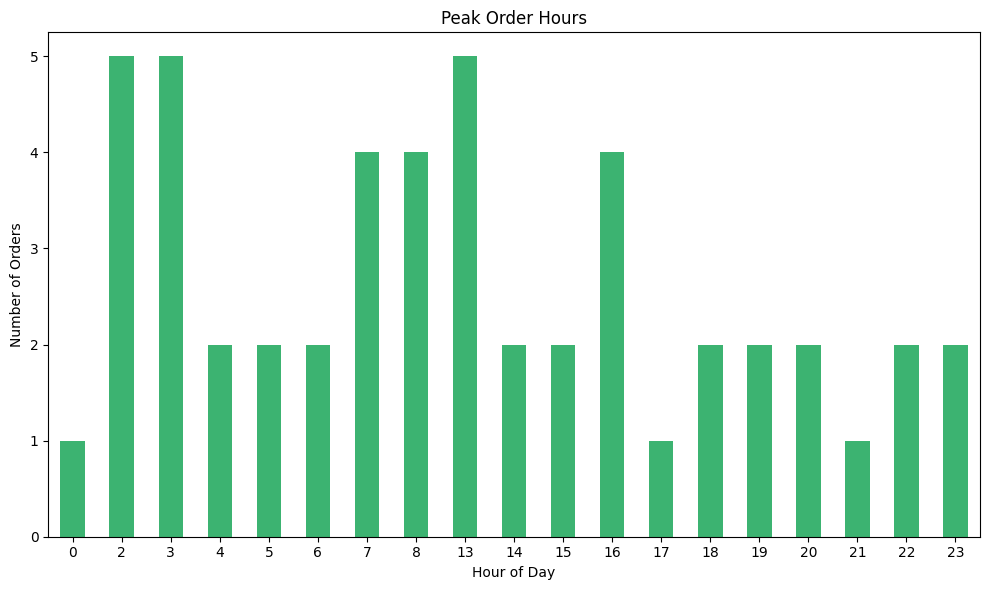

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Sample entities
customers = [
    {'customer_id': 1, 'customer_name': 'Dipshikha', 'locality': 'Hyderabad'},
    {'customer_id': 2, 'customer_name': 'Amit', 'locality': 'Delhi'},
    {'customer_id': 3, 'customer_name': 'Sara', 'locality': 'Mumbai'},
    {'customer_id': 4, 'customer_name': 'John', 'locality': 'Chennai'},
    {'customer_id': 5, 'customer_name': 'Priya', 'locality': 'Bangalore'}
]

restaurants = [
    {'restaurant_id': 101, 'restaurant_name': 'Spice Hub', 'locality': 'Hyderabad'},
    {'restaurant_id': 102, 'restaurant_name': 'Tandoori Town', 'locality': 'Delhi'},
    {'restaurant_id': 103, 'restaurant_name': 'Curry Leaf', 'locality': 'Mumbai'},
    {'restaurant_id': 104, 'restaurant_name': 'Masala Magic', 'locality': 'Chennai'}
]

delivery_partners = [
    {'delivery_partner_id': 201, 'delivery_partner_name': 'Zippy', 'locality': 'Hyderabad'},
    {'delivery_partner_id': 202, 'delivery_partner_name': 'SwiftGo', 'locality': 'Delhi'},
    {'delivery_partner_id': 203, 'delivery_partner_name': 'FastTrack', 'locality': 'Mumbai'},
    {'delivery_partner_id': 204, 'delivery_partner_name': 'QuickRide', 'locality': 'Chennai'}
]

# Generate 50 orders
orders = []
for i in range(50):
    orders.append({
        'order_id': i + 1,
        'customer_id': np.random.choice([1, 2, 3, 4, 5]),
        'restaurant_id': np.random.choice([101, 102, 103, 104]),
        'delivery_partner_id': np.random.choice([201, 202, 203, 204]),
        'order_value': np.random.randint(100, 1000),
        'delivery_time': np.random.randint(10, 90),  # in minutes
        'order_status': np.random.choice(['Delivered', 'Cancelled'], p=[0.75, 0.25]),
        'timestamp': pd.Timestamp('2025-09-01') + pd.to_timedelta(np.random.randint(0, 168), unit='h')  # 1 week range
    })

# Convert to DataFrame
df_orders = pd.DataFrame(orders)
df_customers = pd.DataFrame(customers)
df_restaurants = pd.DataFrame(restaurants)
df_partners = pd.DataFrame(delivery_partners)

# Merge customer names
df = df_orders.merge(df_customers, on='customer_id', how='left')

# 🧮 Total Order Value per Customer
total_order_value = df.groupby('customer_name')['order_value'].sum().reset_index()
print("Total Order Value per Customer:")
print(total_order_value)

# ⏱ Average Delivery Time per Customer
avg_delivery_time = df.groupby('customer_name')['delivery_time'].mean().reset_index()
print("\nAverage Delivery Time per Customer:")
print(avg_delivery_time)

# ❌ Customers with Frequent Cancellations
cancelled = df[df['order_status'] == 'Cancelled']
cancel_counts = cancelled['customer_name'].value_counts()
frequent_cancellers = cancel_counts[cancel_counts > 2]  # Threshold: more than 2 cancellations
print("\nCustomers with Frequent Cancellations:")
print(frequent_cancellers)

# 🕒 Peak Order Hours
df['hour'] = df['timestamp'].dt.hour
peak_hours = df['hour'].value_counts().sort_index()
print("\nPeak Order Hours:")
print(peak_hours)

# 📊 Visualization
plt.figure(figsize=(10, 6))
peak_hours.plot(kind='bar', color='mediumseagreen')
plt.title('Peak Order Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [0]:
%sql


---------------------------------------------------------------------------
ParseException                            Traceback (most recent call last)
File <command-7588540132190755>, line 1
----> 1 get_ipython().run_cell_magic('sql', '', '\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Set seed for reproducibility\nnp.random.seed(42)\n\n# Sample entities\ncustomers = [\n    {\'customer_id\': 1, \'customer_name\': \'Dipshikha\', \'locality\': \'Hyderabad\'},\n    {\'customer_id\': 2, \'customer_name\': \'Amit\', \'locality\': \'Delhi\'},\n    {\'customer_id\': 3, \'customer_name\': \'Sara\', \'locality\': \'Mumbai\'},\n    {\'customer_id\': 4, \'customer_name\': \'John\', \'locality\': \'Chennai\'},\n    {\'customer_id\': 5, \'customer_name\': \'Priya\', \'locality\': \'Bangalore\'}\n]\n\nrestaurants = [\n    {\'restaurant_id\': 101, \'restaurant_name\': \'Spice Hub\', \'locality\': \'Hyderabad\'},\n    {\'restaurant_id\': 102, \'restaurant_name\': \'Tandoori Town\', \'loca